___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Content Copyright by Pierian Data</em></center>

# Overview of Received Emails

Now that we understand how to send emails progammatically with Python, let's explore how we can read and search recieved emails. To do we will use the built-in [imaplib library](https://docs.python.org/3/library/imaplib.html#imap4-example). We will also use the built in [email](https://docs.python.org/3/library/email.examples.html) library for parsing through the recieved emails.
The imaplib uses a special syntax to be able to work with the Email.

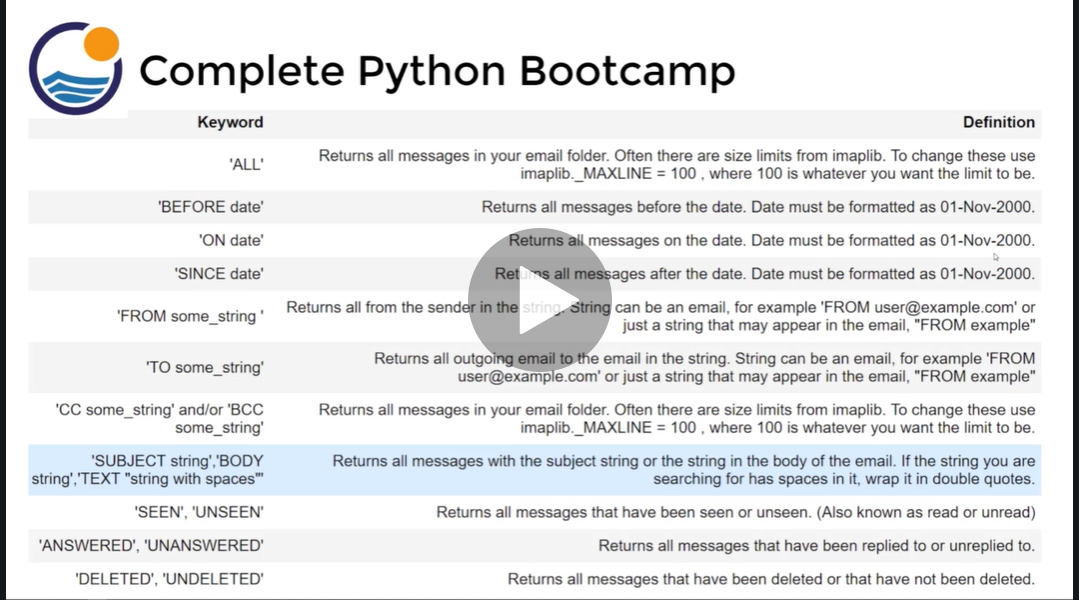

In [1]:
import imaplib

In [2]:
M = imaplib.IMAP4_SSL('imap.gmail.com') #IMAP server is not same as the SMTP server
#Init signature:imaplib.IMAP4_SSL(host='',port=993,keyfile=None,certfile=None,ssl_context=None,)
#Docstring: IMAP4 client class over SSL connection

In [3]:
import getpass

In [4]:
user = input("Enter your email: ")

Enter your email: test


In [5]:
# Remember , you may need an app password if you are a gmail user
# 
password = getpass.getpass("Enter your password: ")

Enter your password: ········


In [ ]:
M.login(user,password)
#Signature: M.login(user, password)
#Docstring: Identify client using plaintext password.

In [6]:
M.list()
#Signature: M.list(directory='""', pattern='*')
#Docstring:List mailbox names in directory matching pattern.

error: command LIST illegal in state NONAUTH, only allowed in states AUTH, SELECTED

In [12]:
# Connect to your inbox
M.select("inbox")
#Signature: M.select(mailbox='INBOX', readonly=False)
#Docstring: Select a mailbox.

('OK', [b'28297'])

## Searching Mail

Now that we have connected to our mail, we should be able to search for it using the specialized syntax of IMAP. Here are the different search keys you can use:

<table border='1' >
    <tr >
        <th align='center'>Keyword </th>
        <th align='center'>Definition</th>
    </tr>
    <tr>
        <td>'ALL'</td>
        <td>
        Returns all messages in your email folder. Often there are size limits from imaplib.
        To change these use imaplib._MAXLINE = 100 , where 100 is whatever you want the limit to be.
        </td>
    </tr>
    
    <tr>
        <td>'BEFORE date'</td>
        <td>
        Returns all messages before the date. Date must be formatted as 01-Nov-2000.
        </td>
    </tr>
    
     <tr>
        <td>'ON date'</td>
        <td>
        Returns all messages on the date. Date must be formatted as 01-Nov-2000.
        </td>
    </tr>
    
     <tr>
        <td>'SINCE date'</td>
        <td>
        Returns all messages after the date. Date must be formatted as 01-Nov-2000.
        </td>
    </tr>
    
    <tr>
        <td>'FROM some_string '</td>
        <td>
        Returns all from the sender in the string. String can be an email, for example 'FROM               user@example.com' or just a string that may appear in the email, "FROM example"
        </td>
    </tr>
    
    <tr>
        <td>'TO some_string'</td>
        <td>
        Returns all outgoing email to the email in the string. String can be an email, for example 'FROM user@example.com' or just a string that may appear in the email, "FROM example"
        </td>
    </tr>
    
    <tr>
        <td>'CC some_string' and/or 'BCC some_string'</td>
        <td>
        Returns all messages in your email folder. Often there are size limits from imaplib.
        To change these use imaplib._MAXLINE = 100 , where 100 is whatever you want the limit to be.
        </td>
    </tr>
    
    <tr>
        <td>'SUBJECT string','BODY string','TEXT "string with spaces"'</td>
        <td>
        Returns all messages with the subject string or the string in the body of the email. If the string you are searching for has spaces in it, wrap it in double quotes.
        </td>
    </tr>
    
    <tr>
        <td>'SEEN', 'UNSEEN'</td>
        <td>
        Returns all messages that have been seen or unseen. (Also known as read or unread)
        </td>
    </tr>
    
    
        <tr>
        <td>'ANSWERED', 'UNANSWERED'</td>
        <td>
        Returns all messages that have been replied to or unreplied to. 
        </td>
    </tr>
    
    
        <tr>
        <td>'DELETED', 'UNDELETED'</td>
        <td>
        Returns all messages that have been deleted or that have not been deleted.
        </td>
    </tr>
    
    
</table>

You can also use the logical operators AND and OR to combine the above statements. Check out the full list of search keys here: http://www.4d.com/docs/CMU/CMU88864.HTM.

Please note that some IMAP server providers for different email services will have slightly different syntax. You may need to experiment to get the results you want.

___________
___________

Now we can search our mail for any term we want.  

In [15]:
# Use if you get an error saying limit was reached
imaplib._MAXLINE = 10000000

Send yourself a test email with the subject line:

    this is a test email for python

Or some other uniquely identifying string.    

We will now need to reconnect to our imap server. You will probably need to restart your kernel for this step if you are using jupyter notebook.

In [ ]:
# Restart your kernel and run the following:
import imaplib
import getpass
M = imaplib.IMAP4_SSL('imap.gmail.com')
user = input("Enter your email: ")
password = getpass.getpass("Enter your password: ")
M.login(user,password)


In [2]:
# Connect to your inbox
M.select("inbox")

('OK', [b'28299'])

Let's now search and confirm if it is there:

In [105]:
typ ,data = M.search(None,'SUBJECT "this is a test email for python"') 
#Search mailbox for matching messages.

We can now save what it has returned:

In [106]:
typ

'OK'

In [107]:
data #This is just id of the emails found. This will have multiple ids if multiple matches are found.

[b'28298']

The data will be a list of unique ids.

In [108]:

# typ, data = M.fetch(data[0],"(RFC822)")

In [112]:
result, email_data = M.fetch(data[0],"(RFC822)")

In [113]:
raw_email = email_data[0][1]

In [116]:
raw_email_string = raw_email.decode('utf-8')

We can use the built in email library to help parse this raw string.

In [120]:
import email

In [121]:
email_message = email.message_from_string(raw_email_string)

In [125]:
for part in email_message.walk():
    if part.get_content_type() == "text/plain":
        body = part.get_payload(decode=True)
        print(body)

b'This is a test to see if the python search worked.\r\n'


Excellent! We've successfully have been able to check our email's inbox , filter by some condition, and read the body of the text that was there. This will come in handy in the near future!